## Source Information
---
**Created by**: Bob Sinkovits 

**Updated by**: October 25, 2024 by Gloria Seo

**Resources**: https://github.com/sinkovit/PythonSeries

---

## Goal
This Jupyter notebook demonstrates how to use the Dask library for parallel processing, specifically focusing on visualizing the task graphs (DAGs) that Dask creates to efficiently manage dependencies and computation on chunked data.

# Dask Graphs

The key element of `dask` is the scheduler which builds a Direct Acyclic Graph of all the operations to be executed on each chunk of data to compute the final result.

The DAG is the key feature that allows `dask` to understand the dependency graph between all the steps in a set of computations and parallelize accordingly.

## Required Modules for the Jupyter Notebook
Before running the notebook, make sure to load the following modules.

**Module: dask, cupy, graphviz** 

In [7]:
import dask.array as da
import cupy as cp 
from dask import array as da


As I needed to install the Graphviz package, I have installed it using the pip command.

In [8]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
import graphviz

## Creating a Dask Array

In [10]:
x = da.from_array(cp.ones(15), chunks=(5,))

This command creates a Dask array with 15 elements divided into 3 chunks of size 5. Each chunk can be processed in parallel for efficient computation.

The cp.ones(15) creates a CuPy array filled with ones on the GPU, allowing Dask to leverage GPU memory for enhanced performance.

## Visualizing the Computation Graph:

`visualize()` calls `graphviz` to create a graphical representation of the graph

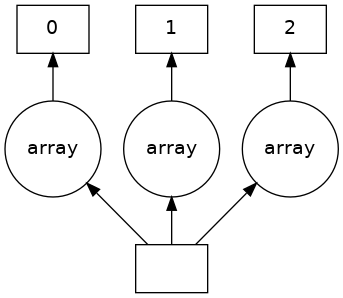

In [11]:
x.visualize()

Then, lets create a new Dask array by adding 1 to each element of the Dask array x.

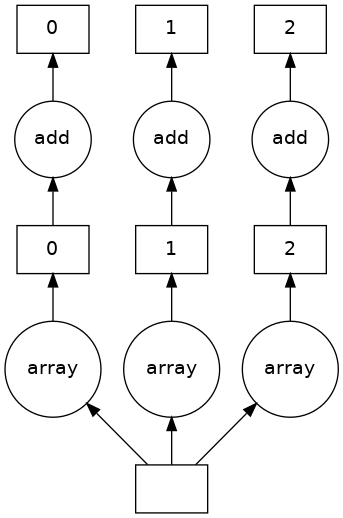

In [12]:
(x+1).visualize()

After adding 1 to each element of x, the sum() method is called to compute the sum of all elements in the resulting Dask array.

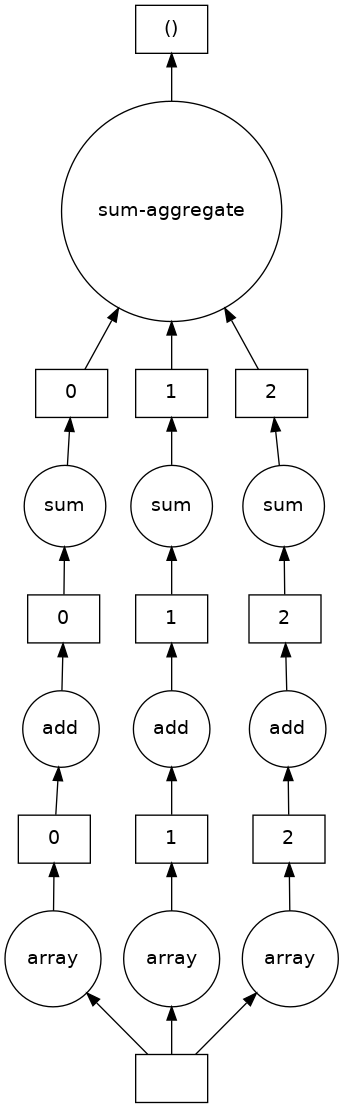

In [13]:
(x+1).sum().visualize()

Let's try with a more complex example.

In [14]:
m = da.ones((15, 15), chunks=(5,5))

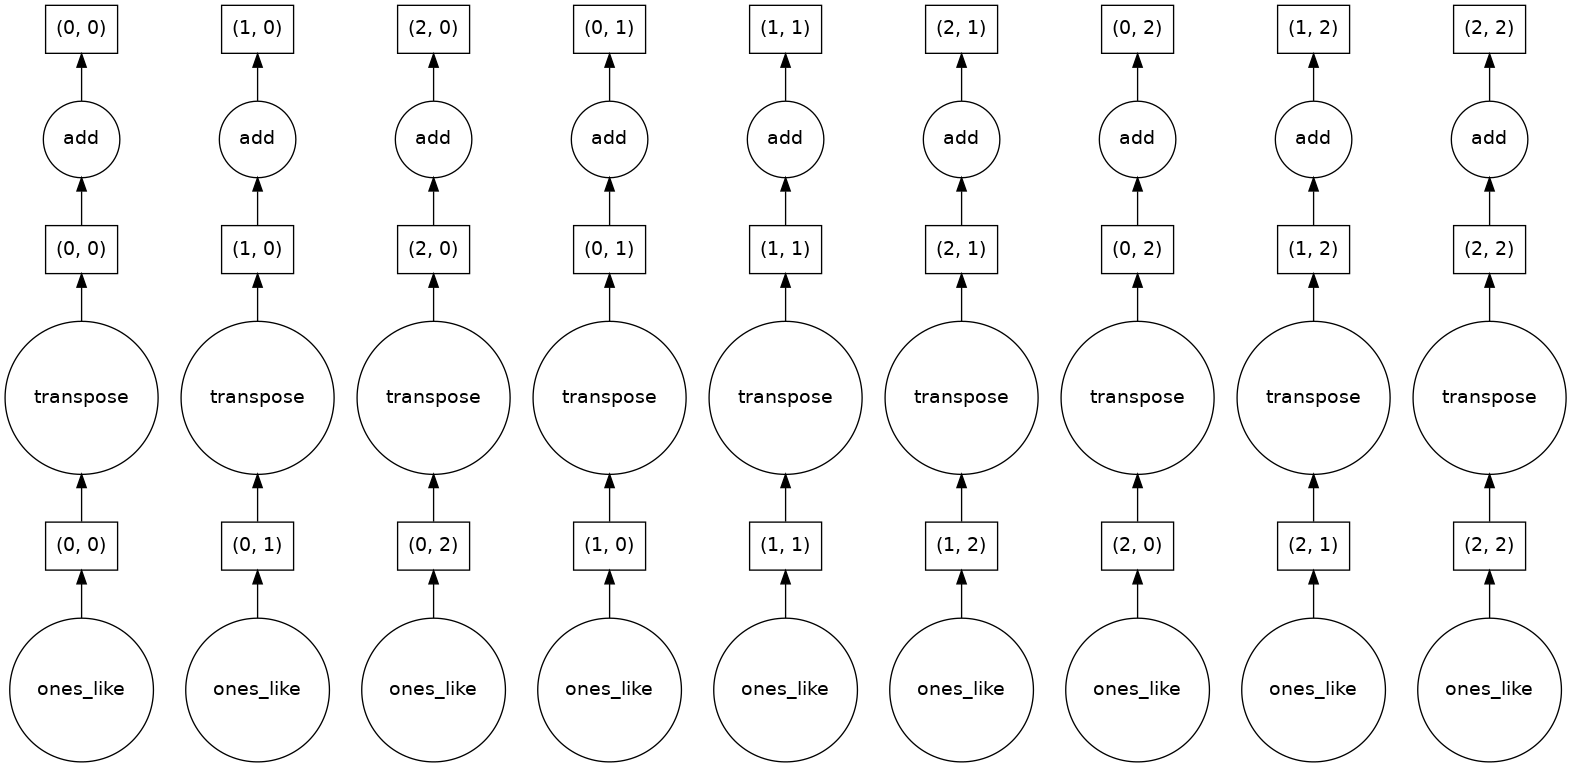

In [15]:
(m.T + 1).visualize()

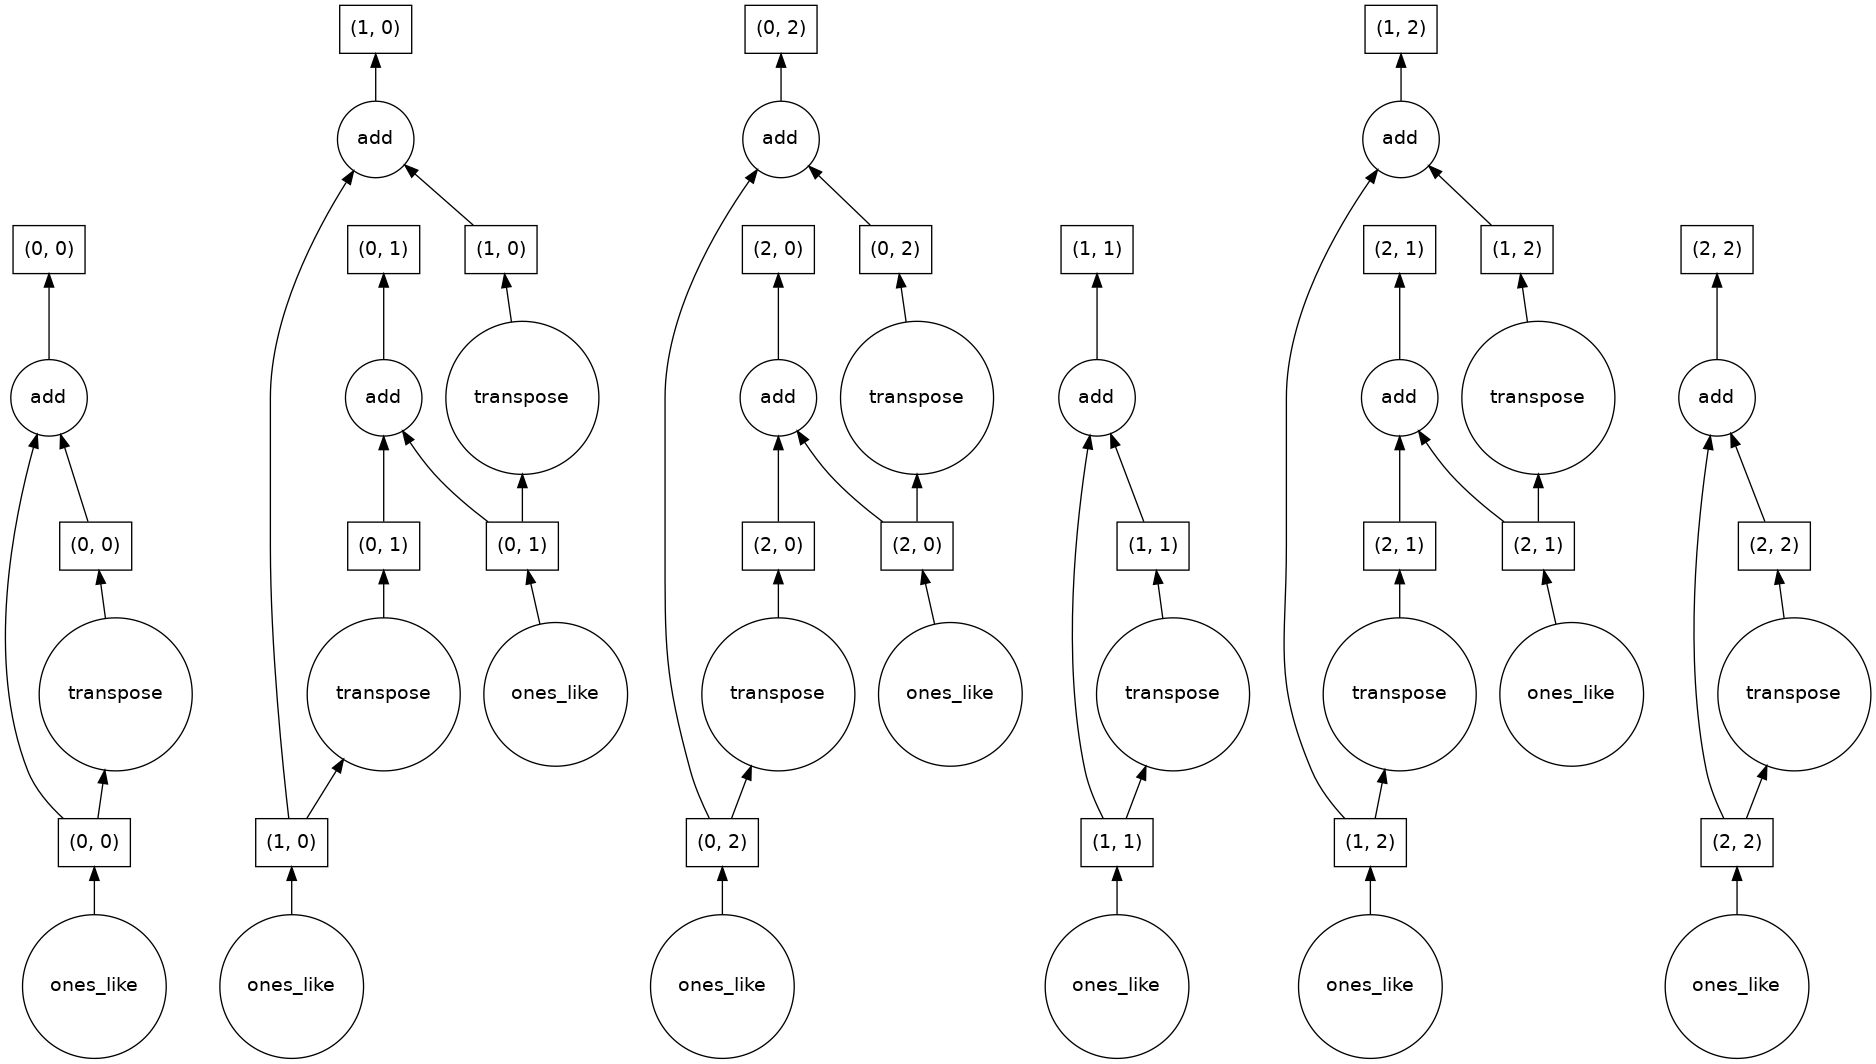

In [16]:
(m.T + m).visualize()

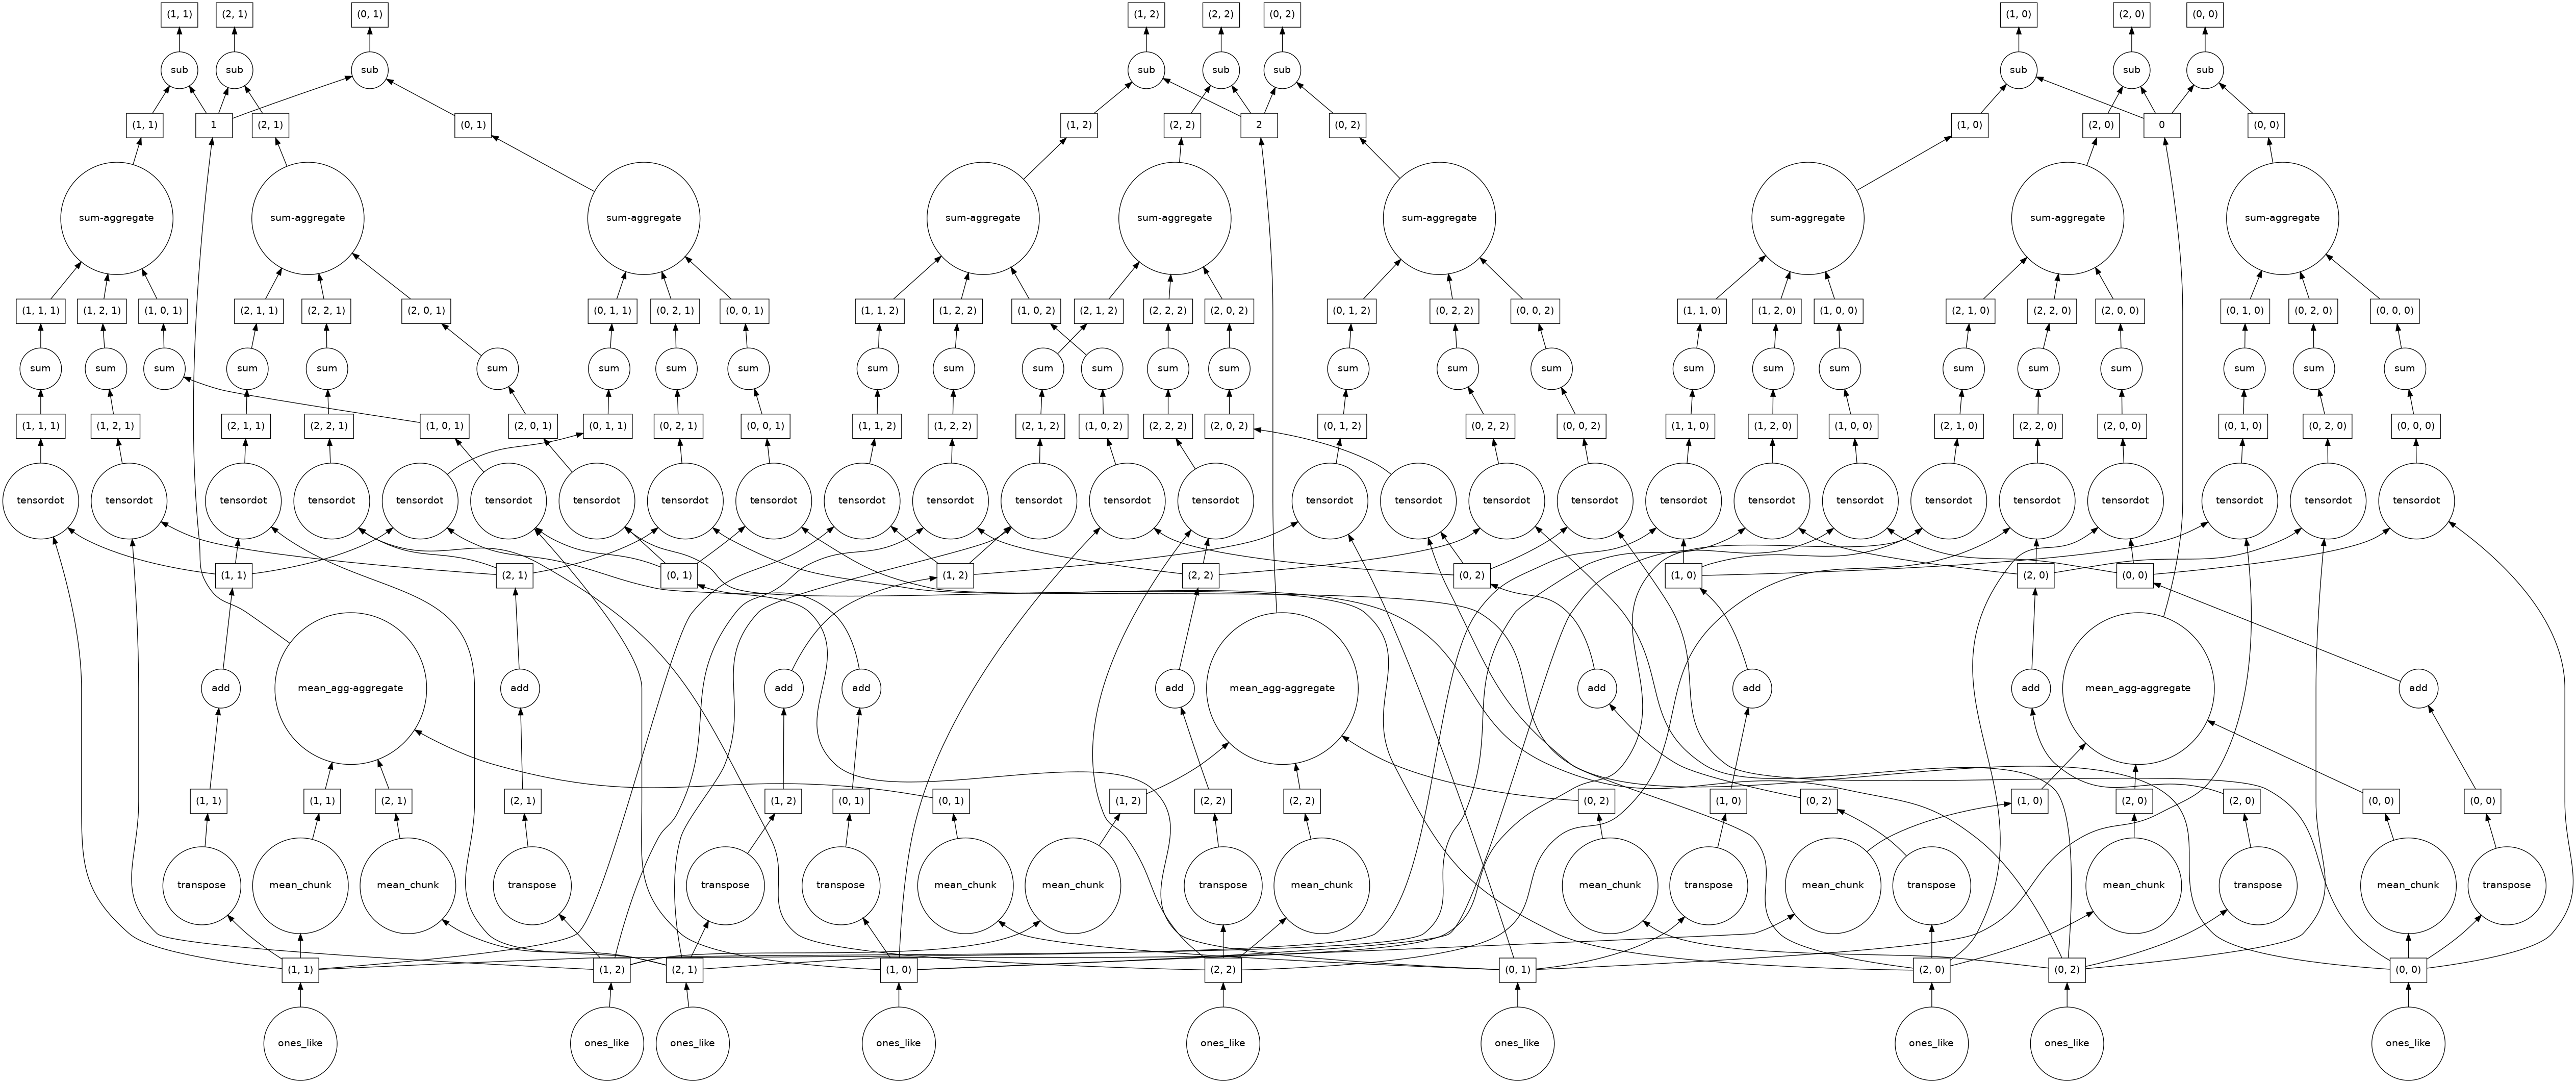

In [17]:
(m.dot(m.T + 1) - m.mean(axis=0)).visualize()

In [18]:
(m.dot(m.T + 1) - m.mean(axis=0)).compute()

array([[29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
        29., 29.],
       [29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29., 29.,
       

## Submit Ticket
If you find anything that needs to be changed, edited, or if you would like to provide feedback or contribute to the notebook, please submit a ticket by contacting us at:

Email: consult@sdsc.edu

We appreciate your input and will review your suggestions promptly!